<a href="https://colab.research.google.com/github/notice4/google-colab-study/blob/main/NY_lottery_winning_nums.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('https://raw.githubusercontent.com/notice4/public-datasets-for-analytics/refs/heads/main/datasets/Lottery_Powerball_Winning_Numbers__Beginning_2010.csv')
data

,Draw Date,Winning Numbers,Multiplier
0,09/26/2020,11 21 27 36 62 24,3.0
1,09/30/2020,14 18 36 49 67 18,2.0
2,10/03/2020,18 31 36 43 47 20,2.0
3,10/07/2020,06 24 30 53 56 19,2.0
4,10/10/2020,05 18 23 40 50 18,3.0
...,...,...,...
1859,11/10/2025,06 28 44 48 58 23,2.0
1860,11/08/2025,03 53 60 62 68 11,2.0
1861,11/12/2025,29 39 43 51 65 23,2.0
1862,11/15/2025,06 07 12 47 53 21,4.0


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1864 entries, 0 to 1863
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Draw Date        1864 non-null   object 
 1   Winning Numbers  1864 non-null   object 
 2   Multiplier       1654 non-null   float64
dtypes: float64(1), object(2)
memory usage: 43.8+ KB


In [26]:
data[['Num1','Num2','Num3','Num4','Num5','Powerball']] = data['Winning Numbers'].str.split(' ', expand=True).astype(int)
data

,Draw Date,Winning Numbers,Multiplier,Num1,Num2,Num3,Num4,Num5,Powerball
0,09/26/2020,11 21 27 36 62 24,3.0,11,21,27,36,62,24
1,09/30/2020,14 18 36 49 67 18,2.0,14,18,36,49,67,18
2,10/03/2020,18 31 36 43 47 20,2.0,18,31,36,43,47,20
3,10/07/2020,06 24 30 53 56 19,2.0,6,24,30,53,56,19
4,10/10/2020,05 18 23 40 50 18,3.0,5,18,23,40,50,18
...,...,...,...,...,...,...,...,...,...
1859,11/10/2025,06 28 44 48 58 23,2.0,6,28,44,48,58,23
1860,11/08/2025,03 53 60 62 68 11,2.0,3,53,60,62,68,11
1861,11/12/2025,29 39 43 51 65 23,2.0,29,39,43,51,65,23
1862,11/15/2025,06 07 12 47 53 21,4.0,6,7,12,47,53,21


In [29]:
# correlation between nums
data[['Num1','Num2','Num3','Num4','Num5','Powerball']].corr()

,Num1,Num2,Num3,Num4,Num5,Powerball
Num1,1.000000,0.631577,0.455780,0.345505,0.217551,-0.015544
Num2,0.631577,1.000000,0.706657,0.510826,0.330479,-0.018569
Num3,0.455780,0.706657,1.000000,0.742807,0.497969,-0.056167
Num4,0.345505,0.510826,0.742807,1.000000,0.682401,-0.080204
Num5,0.217551,0.330479,0.497969,0.682401,1.000000,-0.110566
Powerball,-0.015544,-0.018569,-0.056167,-0.080204,-0.110566,1.000000


<Axes: >

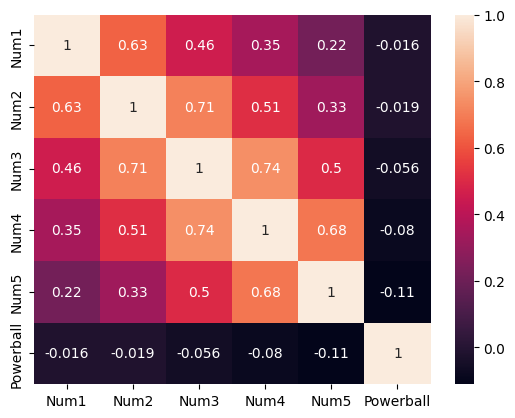

In [30]:
# vizualize the corelation between numbers
sns.heatmap(data[['Num1','Num2','Num3','Num4','Num5','Powerball']].corr(), annot=True)


In [37]:
data['Draw Date'] = pd.to_datetime(data['Draw Date'], errors='coerce')

In [41]:
# shuffle numbers in num1, num2, and so on...
data[['Num1','Num2','Num3','Num4','Num5','Powerball']] = data[['Num1','Num2','Num3','Num4','Num5','Powerball']].sample(frac=1, random_state=42).reset_index(drop=True)
data


,Draw Date,Winning Numbers,Multiplier,Num1,Num2,Num3,Num4,Num5,Powerball,Year,Month
0,2020-09-26,11 21 27 36 62 24,3.0,2,12,16,29,54,6,2020,9
1,2020-09-30,14 18 36 49 67 18,2.0,5,8,15,22,49,25,2020,9
2,2020-10-03,18 31 36 43 47 20,2.0,1,17,52,58,64,1,2020,10
3,2020-10-07,06 24 30 53 56 19,2.0,23,49,57,64,67,20,2020,10
4,2020-10-10,05 18 23 40 50 18,3.0,22,23,24,45,62,5,2020,10
...,...,...,...,...,...,...,...,...,...,...,...
1859,2025-11-10,06 28 44 48 58 23,2.0,9,30,31,50,54,39,2025,11
1860,2025-11-08,03 53 60 62 68 11,2.0,11,18,39,58,62,3,2025,11
1861,2025-11-12,29 39 43 51 65 23,2.0,8,28,29,34,38,35,2025,11
1862,2025-11-15,06 07 12 47 53 21,4.0,17,36,47,63,68,25,2025,11


<Axes: >

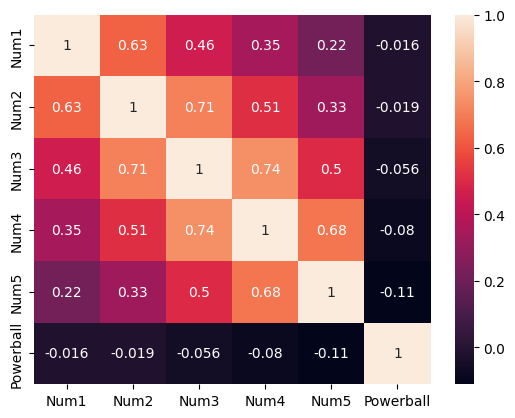

In [42]:
sns.heatmap(data[['Num1','Num2','Num3','Num4','Num5','Powerball']].corr(), annot=True)


In [48]:
# clustering of data (numbers)
from sklearn.cluster import KMeans

model = KMeans(n_clusters=5)
model.fit(data[['Num2','Num3','Num4']])
data['cluster'] = model.predict(data[['Num2','Num3','Num4']])




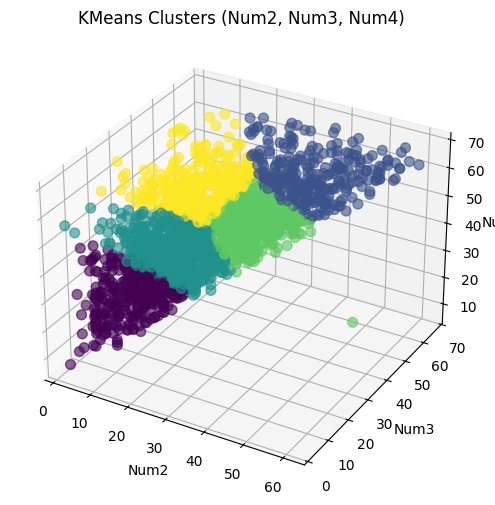

In [49]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# точки
ax.scatter(
    data['Num2'], data['Num3'], data['Num4'],
    c=data['cluster'], cmap='viridis', s=50, alpha=0.6
)

ax.set_xlabel('Num2')
ax.set_ylabel('Num3')
ax.set_zlabel('Num4')
ax.set_title('KMeans Clusters (Num2, Num3, Num4)')

plt.show()


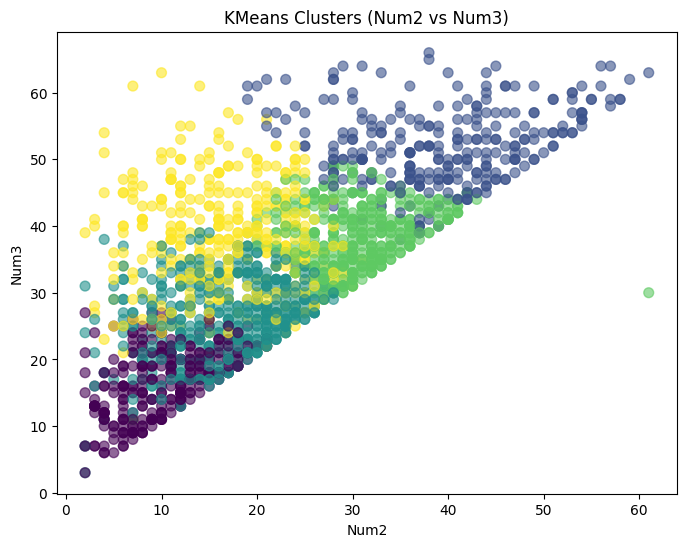

In [50]:
plt.figure(figsize=(8,6))
plt.scatter(
    data['Num2'], data['Num3'],
    c=data['cluster'], cmap='viridis', s=50, alpha=0.6
)
plt.xlabel('Num2')
plt.ylabel('Num3')
plt.title('KMeans Clusters (Num2 vs Num3)')
plt.show()


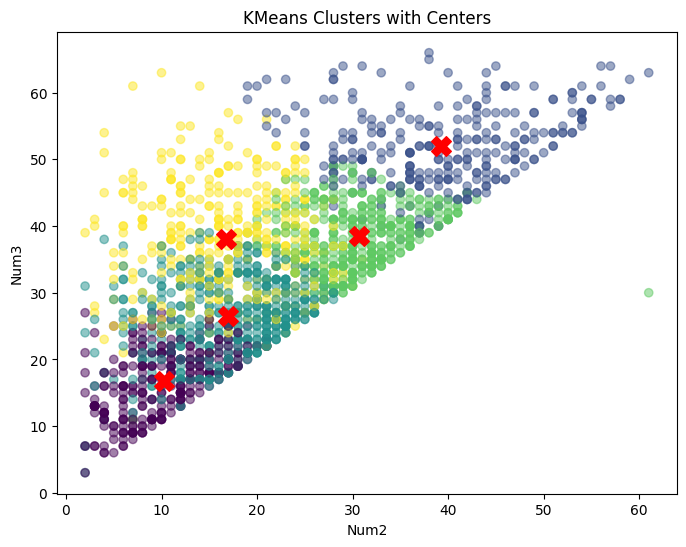

In [51]:
centers = model.cluster_centers_

plt.figure(figsize=(8,6))
plt.scatter(data['Num2'], data['Num3'], c=data['cluster'], cmap='viridis', alpha=0.5)
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, marker='X')  # центры кластеров
plt.xlabel('Num2')
plt.ylabel('Num3')
plt.title('KMeans Clusters with Centers')
plt.show()


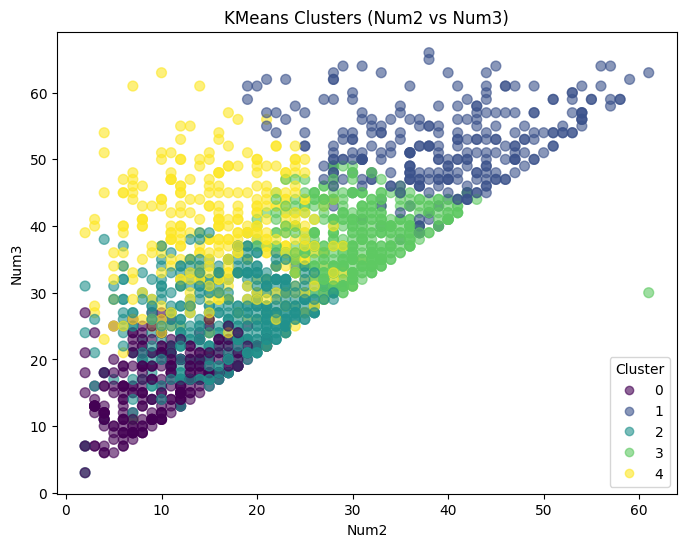

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
scatter = plt.scatter(data['Num2'], data['Num3'], c=data['cluster'], cmap='viridis', s=50, alpha=0.6)

# создаём легенду для кластеров
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.xlabel('Num2')
plt.ylabel('Num3')
plt.title('KMeans Clusters (Num2 vs Num3)')
plt.show()
